In [1]:
import pycascades as pc

We start with creating two cusp tipping elements.

In [2]:
cusp_element_0 = pc.cusp( a = -4, b = 1, c = 0, x_0 = 0.5 )
cusp_element_1 = pc.cusp( a = -4, b = 1, c = 0, x_0 = 0.5 )

We then create two linear couplings with strength 0.15 and 0.2

In [3]:
coupling_0 = pc.linear_coupling( strength = 0.05 )
coupling_1 = pc.linear_coupling( strength = 0.2 )

Next we put things together by creating a tipping network and adding the elements.
tipping_network is derived from networkx DiGraph class and all its methods
can be used, too.

In [4]:
net = pc.tipping_network()
net.add_element( cusp_element_0 )
net.add_element( cusp_element_1 )
net.add_coupling( 0, 1, coupling_1 )
net.add_coupling( 1, 0, coupling_0 )

We plot it using the plotter toolkit.

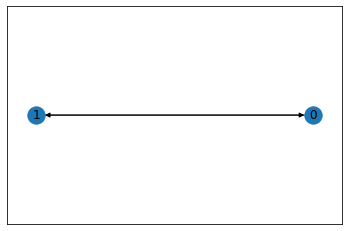

In [5]:
pc.plotter.network(net).show()

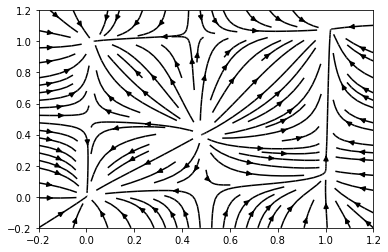

In [6]:
pc.plotter.phase_flow(net, xrange = [-0.2,1.2], yrange = [-0.2,1.2]).show()

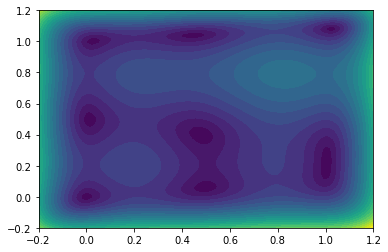

In [7]:
pc.plotter.phase_space(net, xrange = [-0.2,1.2], yrange = [-0.2,1.2]).show()


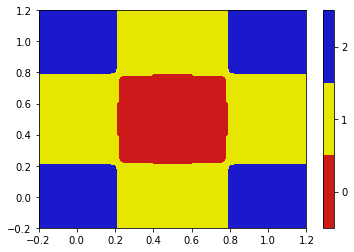

In [8]:
pc.plotter.stability(net, xrange = [-0.2,1.2], yrange = [-0.2,1.2]).show()

Next we create an evolve module to simulate the tipping network 
as dynamical system.

In [9]:
initial_state = [0.1,0.9]
ev = pc.evolve( net, initial_state )
timestep = 0.01
t_end = 10
ev.integrate( timestep , t_end )

We plot the temporal evolution

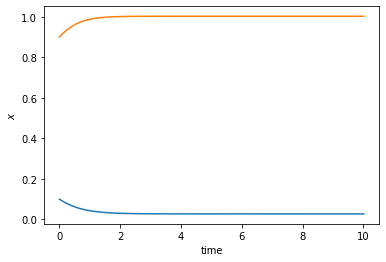

In [10]:
pc.plotter.series( ev.get_timeseries()[0], ev.get_timeseries()[1][:,:] ).show()


We repeat and this time use the equilibrate method to end integration when an equilibirum is reached.

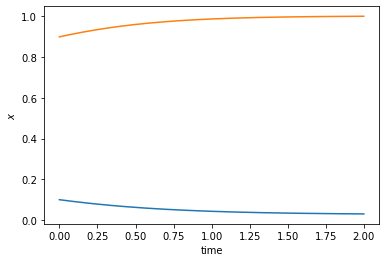

In [11]:
ev = pc.evolve( net , initial_state )

tol = 0.005
breaktime = 100

ev.equilibrate( tol, timestep, breaktime )
pc.plotter.series( ev.get_timeseries()[0], ev.get_timeseries()[1][:,:] ).show()

Now we create a network with one cusp element and increase the control
until the tipping point is reached

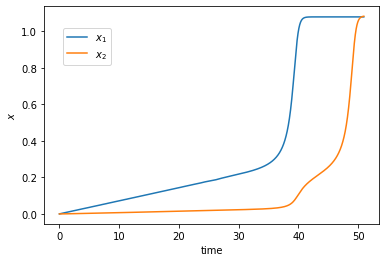

In [12]:
initial_state = [0,0]

net = pc.tipping_network()
net.add_element( cusp_element_0 )
net.add_element( cusp_element_1 )
net.add_coupling(0,1,coupling_1)
ev = pc.evolve( net, initial_state )

dc = 0.005
while not net.get_tip_states(ev.get_timeseries()[1][-1,:]).any():
    ev.equilibrate( tol, timestep, breaktime )
    c = net.nodes[0]['data'].get_par()['c']
    net.set_param( 0, 'c', c+dc )

p = pc.plotter.series( ev.get_timeseries()[0], ev.get_timeseries()[1][:,:]
                , legend=True).show()

Finally we work with generating bigger networks.

In [13]:
from networkx import erdos_renyi_graph

In [14]:
G = erdos_renyi_graph(10, 0.25, directed = True, seed = None)
net = pc.gen.networks.from_nxgraph( G, element_pool = [cusp_element_0],
                             coupling_pool = (0,0.2), coupling = 'uniform')

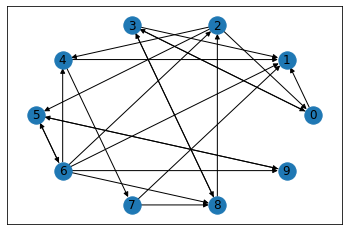

In [15]:
pc.plotter.network(net).show()

Finally we create a spatial graph with the networks module.

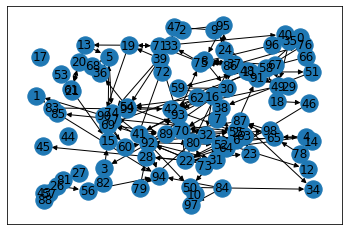

In [16]:
net = pc.gen.networks.spatial_graph(100,0.4,0.1, element_pool=[cusp_element_0], 
                         coupling_pool=[coupling_0])
pc.plotter.network(net, spatial=True).show()